Görseleştirme

In [5]:
import  numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings;
warnings.filterwarnings("ignore")

In [2]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [6]:
df = pd.read_csv("diabetes.csv")

df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df.eq(0).sum()  # Sum of values equal to 0 across columns.

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

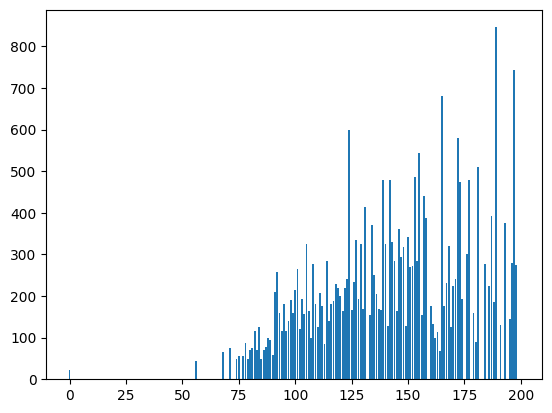

In [ ]:
plt.bar( height= df.Insulin, x = df.Glucose);

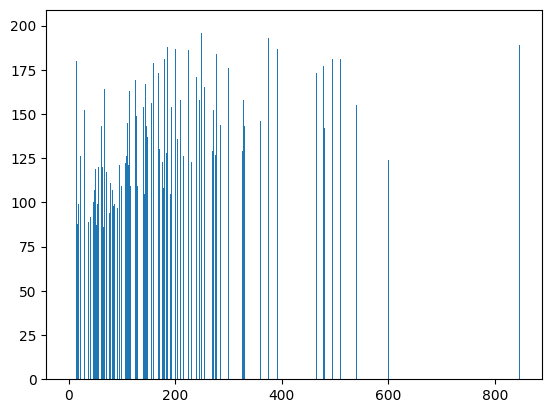

In [ ]:
plt.bar(  df.Insulin,  df.Glucose);

In [ ]:
df = df[df["Glucose"] != 0]
# We have filtered the values in the Glucose column that are not equal to 0 and removed the ones that are equal to 0
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [7]:
bins = [0, 30, 60, float("inf")]
labels = ['Young', 'Middle-aged', 'Elderly']

df["AgeGroup"]= pd.cut(df['Age'], bins=bins, labels=labels)  # a new column
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup
0,6,148,72,35,0,33.6,0.627,50,1,Middle-aged
1,1,85,66,29,0,26.6,0.351,31,0,Middle-aged
2,8,183,64,0,0,23.3,0.672,32,1,Middle-aged
3,1,89,66,23,94,28.1,0.167,21,0,Young
4,0,137,40,35,168,43.1,2.288,33,1,Middle-aged
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,Elderly
764,2,122,70,27,0,36.8,0.340,27,0,Young
765,5,121,72,23,112,26.2,0.245,30,0,Young
766,1,126,60,0,0,30.1,0.349,47,1,Middle-aged


In [8]:
mean_age_insulin = df.groupby('AgeGroup')['Insulin'].mean()  # Mean by age groups
mean_age_insulin

AgeGroup
Young          84.306954
Middle-aged    79.320988
Elderly        15.925926
Name: Insulin, dtype: float64

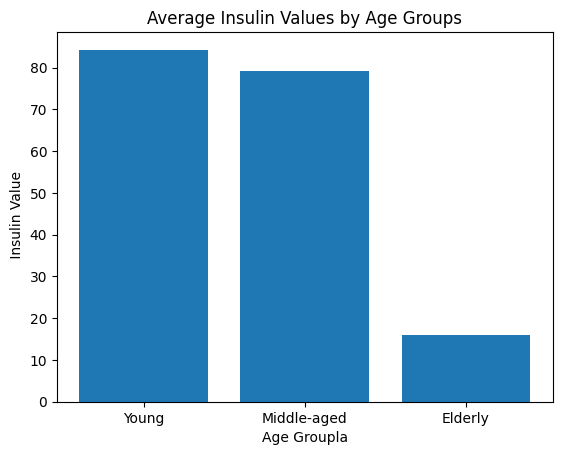

In [9]:
# Bar plot kategorik veri çizimi
plt.bar(mean_age_insulin.index, mean_age_insulin.values )
plt.xlabel('Age Groupla')
plt.ylabel(' Insulin Value')
plt.title('Average Insulin Values by Age Groups')
plt.show()

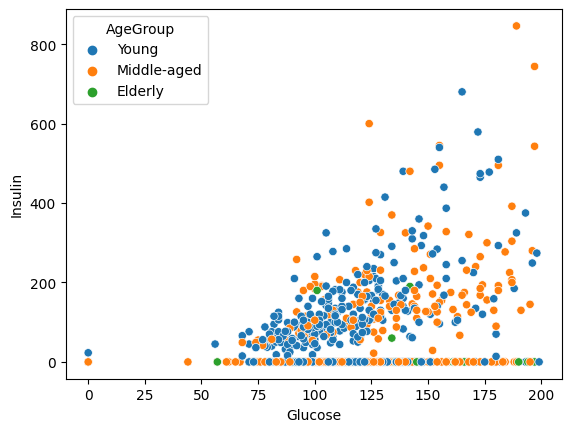

In [11]:
sns.scatterplot(x= "Glucose", y = "Insulin", data = df, hue = "AgeGroup");

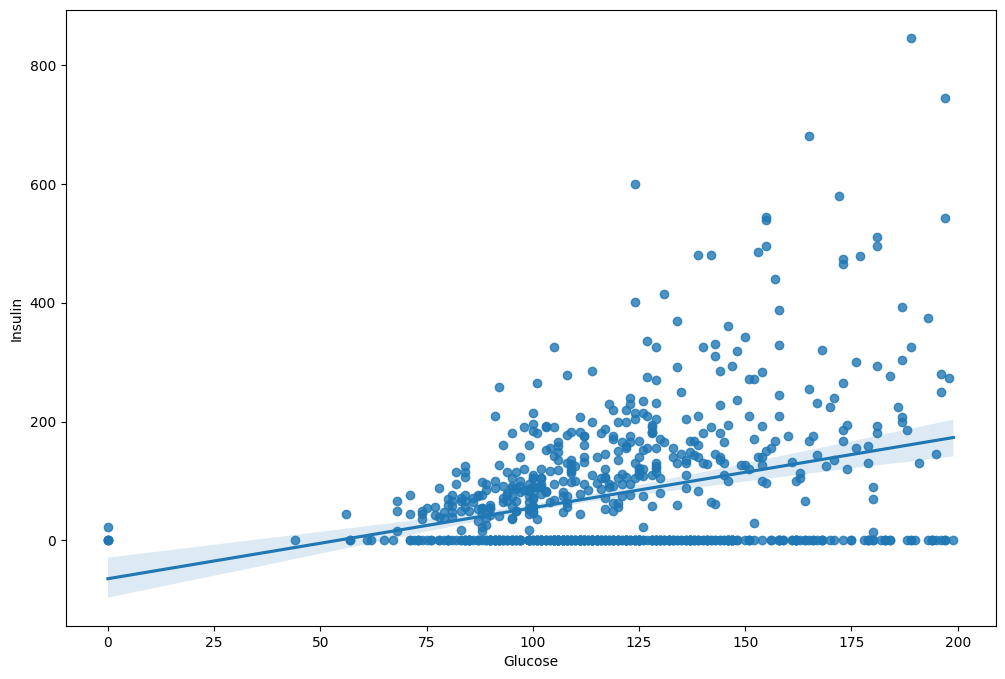

In [12]:
plt.figure(figsize=(12,8))
sns.regplot(x= "Glucose", y = "Insulin", data = df);

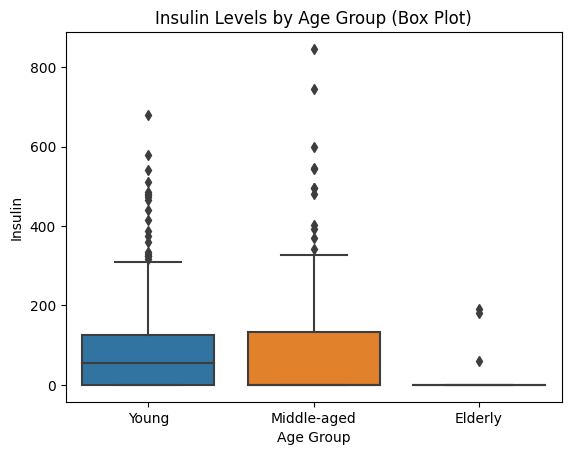

In [13]:
sns.boxplot(x="AgeGroup", y="Insulin", data=df)
plt.xlabel("Age Group")
plt.ylabel("Insulin")
plt.title("Insulin Levels by Age Group (Box Plot)")
plt.show()

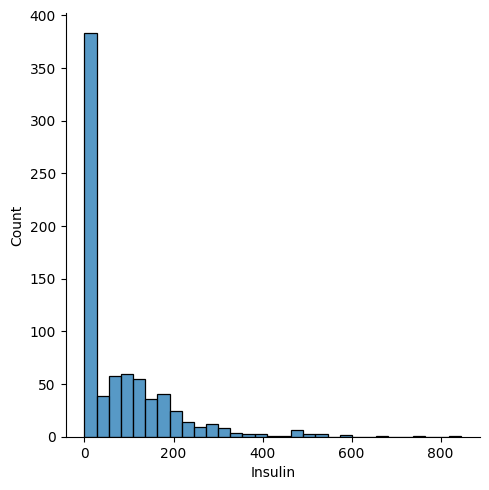

In [14]:
sns.displot(x= "Insulin", data= df);

In [15]:
df.Insulin.max()

846

In [16]:
df.nlargest(10, 'Insulin')  # Let's see the top 10 highest insulin values


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup
13,1,189,60,23,846,30.1,0.398,59,1,Middle-aged
228,4,197,70,39,744,36.7,2.329,31,0,Middle-aged
247,0,165,90,33,680,52.3,0.427,23,0,Young
584,8,124,76,24,600,28.7,0.687,52,1,Middle-aged
409,1,172,68,49,579,42.4,0.702,28,1,Young
286,5,155,84,44,545,38.7,0.619,34,0,Middle-aged
8,2,197,70,45,543,30.5,0.158,53,1,Middle-aged
655,2,155,52,27,540,38.7,0.240,25,1,Young
753,0,181,88,44,510,43.3,0.222,26,1,Young
111,8,155,62,26,495,34.0,0.543,46,1,Middle-aged


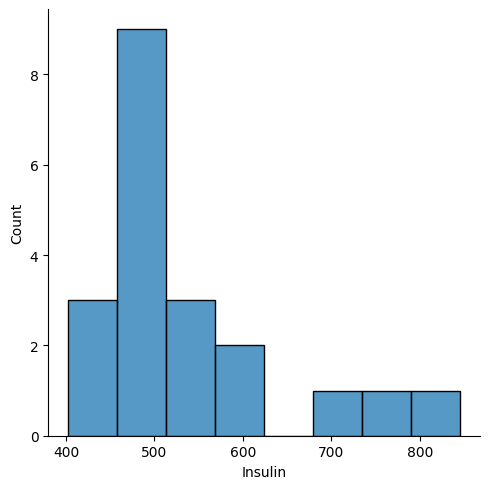

In [17]:
sns.displot (x="Insulin", data = df.nlargest(20, 'Insulin')); # largest 20 insulin values distribution

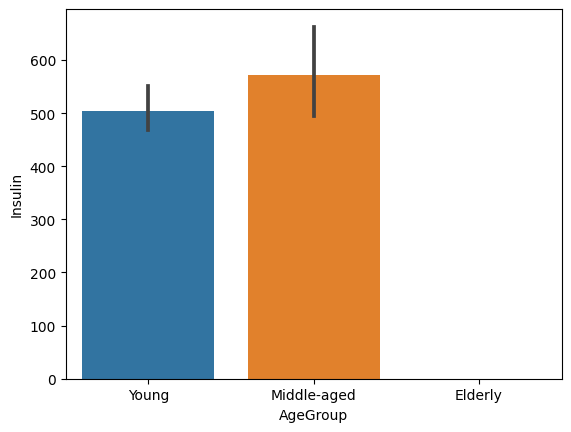

In [19]:
# The insulin values for the top 20 insulin levels by age category
sns.barplot(x="AgeGroup", y="Insulin", data= df.nlargest(20, 'Insulin'));

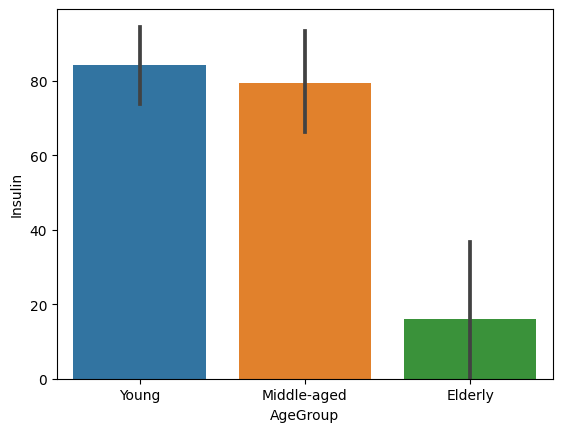

In [22]:
sns.barplot(x="AgeGroup", y="Insulin", data=df);
#"When we create a barplot, we can understand the extent of variation in insulin values through scatter plots and bar plots.
#Values beyond 100 may indicate outliers or health issues"

In [23]:

df.Glucose.max()

199

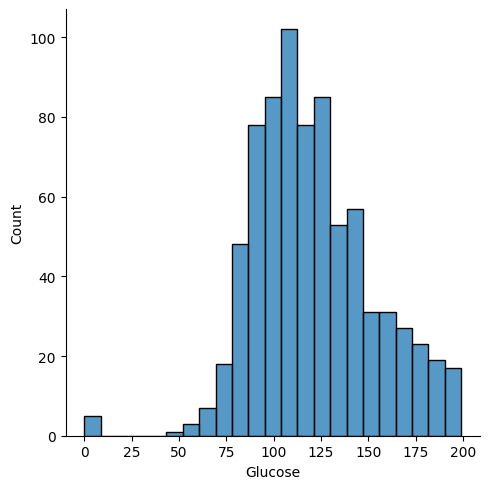

In [24]:
sns.displot(x= "Glucose", data= df);

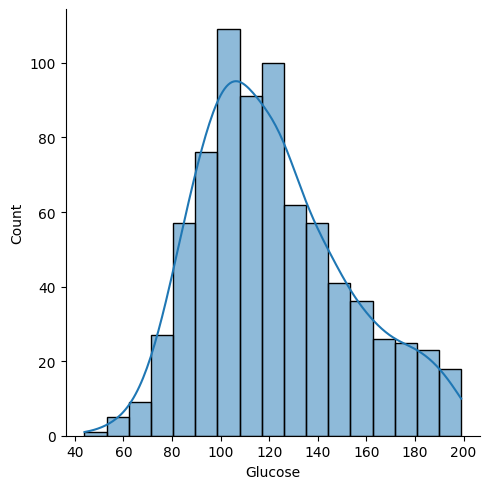

In [ ]:
sns.displot(x= "Glucose", data= df, kde= True);
# The distribution of glucose follows a normal distribution

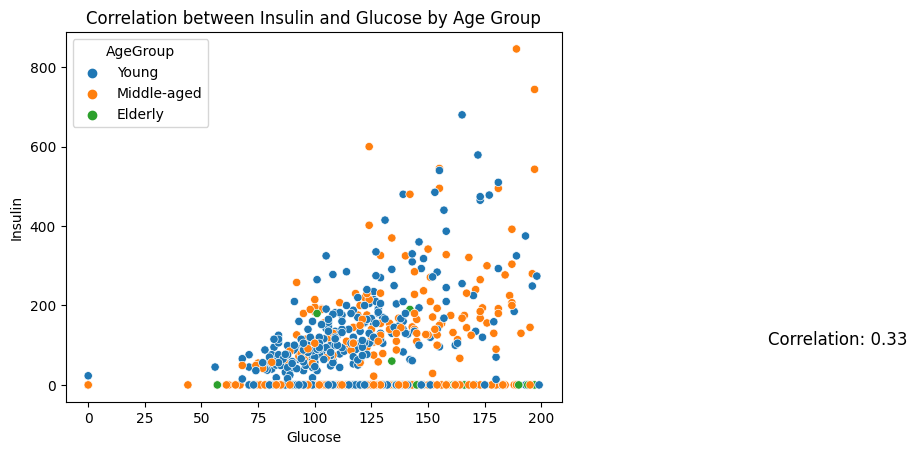

In [34]:
correlation = df[['Insulin', 'Glucose']].corr()

# Create a scatter plot
sns.scatterplot(data=df, x='Glucose', y='Insulin',  hue='AgeGroup')

# Add the correlation matrix to the plot
plt.text(300, 100, f'Correlation: {correlation.loc["Insulin", "Glucose"]:.2f}', fontsize=12)

# Add a title to the plot
plt.title("Correlation between Insulin and Glucose by Age Group")

# Show the plot
plt.show()

In [32]:
#When examining the glucose and insulin values, there appears to be some inconsistency
# in the data related to these biologically correlated variables.
#The variability in these data may signal health issues in individuals.
#Nevertheless, a thorough analysis of the data is warranted."